In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import decomposition
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib import pyplot

from double_CV_builder import DCV

In [7]:
# imports the data
data = pd.read_csv("raw_data/train_call.txt", index_col=0, delimiter="\t").transpose()
topInfo = data.iloc[:3]
data = data.iloc[4:].dropna(axis=1)
classes = pd.read_csv("raw_data/train_clinical.txt", delimiter="\t", index_col=0)
data = classes.join(data).set_index("Subgroup").dropna()
# Add 1 to data because of chi-square feature selection


DCV.outer_repeats = 5
DCV.inner_repeats = 10
DCV.num_features = 150

model = RandomForestClassifier(random_state=123)
modeller = DCV(model)
# prints all the params you can change :)
print(model.get_params().keys())
# select which params you want to test with the inner loop
# space is the paramater space
modeller.hyperParams['n_estimators'] = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
modeller.hyperParams['max_features'] = ["sqrt", "log2"]
#modeller.hyperParams['max_depth'] = [int(x) for x in np.linspace(10, 110, num = 11)]




dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [58]:
# this does everything for you :)
# first is the data used, seconds comes the classifications and than with loop the amount of loops you want to do

modeller.train_fit(data=data, classes=data.index, loop=100)
# some test code

print(accuracy_score(DCV.__class_cleaner__(None, data.index),modeller.predict(data)))

(99, 1352)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(m

accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_feature

accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_feature

accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_feature

accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_featur

accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features

accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
accuracy: 0.4; precision:0.4; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.6; precision:0.6; model:RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=123)
accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_feature

accuracy: 0.5; precision:0.5; model:RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=123)
accuracy: 0.8; precision:0.8; model:RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=123)
accuracy: 0.45; precision:0.45; model:RandomForestClassifier(max_features='log2', n_estimators=500, random_state=123)
(99, 1352)
1.0


In [59]:
print(topInfo.transpose().iloc[:-1].loc[modeller.get_best_features()[0]])

                  Start          End  Nclone
Chromosome                                  
1            30716764.0   30984527.0    19.0
1            31136968.0   31957740.0    91.0
1            72489681.0   72620747.0     5.0
1           149369522.0  149394958.0     5.0
2            61025070.0   61061211.0     5.0
...                 ...          ...     ...
8            41575958.0   42118548.0    55.0
8            42123757.0   42175380.0     9.0
8            48952907.0   49214104.0    27.0
8            49291873.0   50106229.0    46.0
8            50133866.0   50469104.0    16.0

[150 rows x 3 columns]


In [82]:
modeller.all_recall

0
n_estimators max_features        
50           sqrt          0.7000
             log2          0.7250
100          sqrt          0.7375
             log2          0.7000
150          sqrt          0.7000
...                           ...
400          log2          0.6750
450          sqrt          0.6750
             log2          0.6875
500          sqrt          0.6750
             log2          0.7000

[10000 rows x 1 columns]

In [62]:
modeller.all_accuracies.reset_index().pivot_table(index="max_features",columns="n_estimators", aggfunc="mean")

0                                                       \
n_estimators     50      100     150     200     250    300   350     400   
max_features                                                                
log2          0.6375  0.6425  0.6300  0.6325  0.6275  0.635  0.64  0.6475   
sqrt          0.6350  0.6450  0.6375  0.6300  0.6300  0.625  0.63  0.6400   

                              
n_estimators     450     500  
max_features                  
log2          0.6500  0.6425  
sqrt          0.6475  0.6425

In [84]:
modeller.all_recall.reset_index().pivot_table(index="max_features",columns="n_estimators", aggfunc="mean")

0                                                       \
n_estimators     50      100     150     200     250    300   350     400   
max_features                                                                
log2          0.6375  0.6425  0.6300  0.6325  0.6275  0.635  0.64  0.6475   
sqrt          0.6350  0.6450  0.6375  0.6300  0.6300  0.625  0.63  0.6400   

                              
n_estimators     450     500  
max_features                  
log2          0.6500  0.6425  
sqrt          0.6475  0.6425

In [85]:
modeller.all_precision.reset_index().pivot_table(index="max_features",columns="n_estimators", aggfunc="mean")

0                                                       \
n_estimators     50      100     150     200     250    300   350     400   
max_features                                                                
log2          0.6375  0.6425  0.6300  0.6325  0.6275  0.635  0.64  0.6475   
sqrt          0.6350  0.6450  0.6375  0.6300  0.6300  0.625  0.63  0.6400   

                              
n_estimators     450     500  
max_features                  
log2          0.6500  0.6425  
sqrt          0.6475  0.6425

(99, 1352)


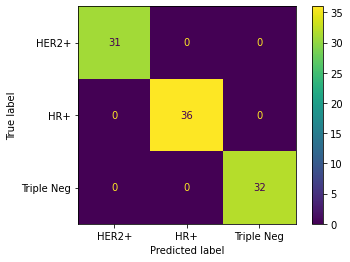

In [63]:
cm = confusion_matrix(data.index, modeller.predict(data))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=modeller.get_best_model().classes_)
disp.plot()

In [64]:
df = pd.DataFrame(data = modeller.all_accuracies.reset_index())
df

,n_estimators,max_features,0
0,50,sqrt,0.7000
1,50,log2,0.7250
2,100,sqrt,0.7375
3,100,log2,0.7000
4,150,sqrt,0.7000
...,...,...,...
9995,400,log2,0.6750
9996,450,sqrt,0.6750
9997,450,log2,0.6875
9998,500,sqrt,0.6750


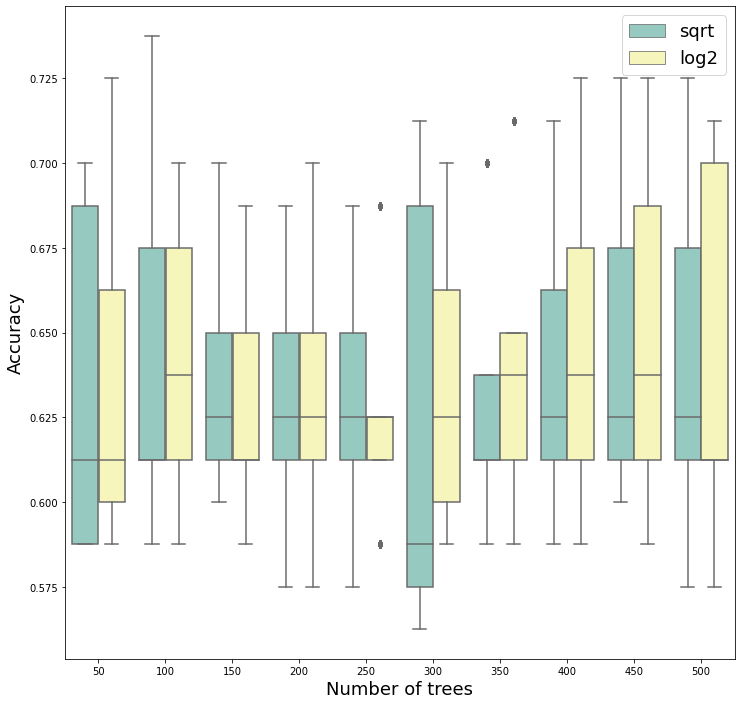

In [76]:
fig, ax = pyplot.subplots(figsize=(12,12))
sns.boxplot(ax = ax, x="n_estimators", y=0, hue="max_features", data=df, palette="Set3")
ax.set_xlabel("Number of trees", size=18)
ax.set_ylabel("Accuracy", size=18)
plt.legend(fontsize=18)
#ax.set(xlabel='Accuracy', ylabel='Number of trees', size=14)
plt.savefig("Figures/RF_doubleboxplot.pdf")
plt.show()

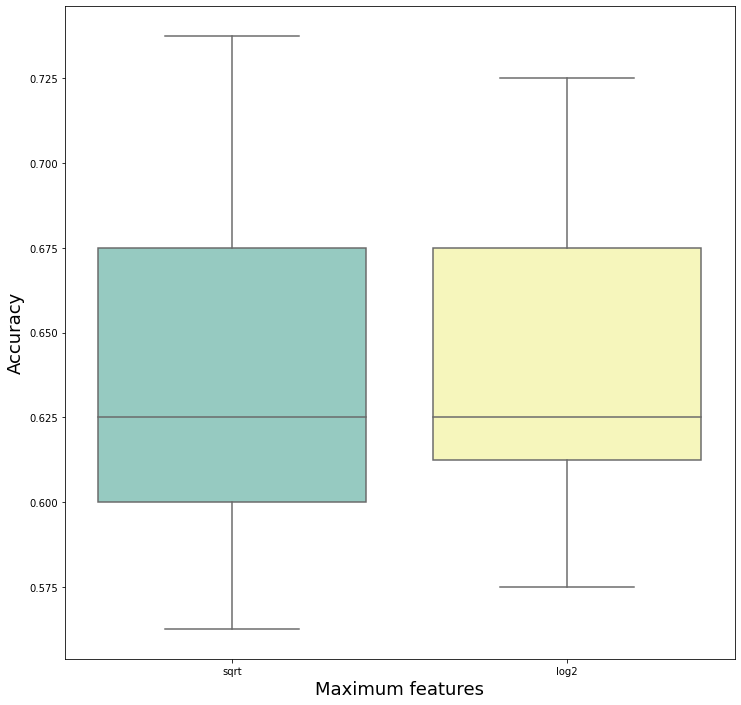

In [77]:
fig, ax = pyplot.subplots(figsize=(12,12))
sns.boxplot(ax = ax, x="max_features", y=0, data=df, palette="Set3")
ax.set_xlabel("Maximum features", size=18)
ax.set_ylabel("Accuracy", size=18)
#ax.set(xlabel='Accuracy', ylabel='Number of trees', size=14)
plt.savefig("Figures/RF_features_boxplot.pdf")
plt.show()

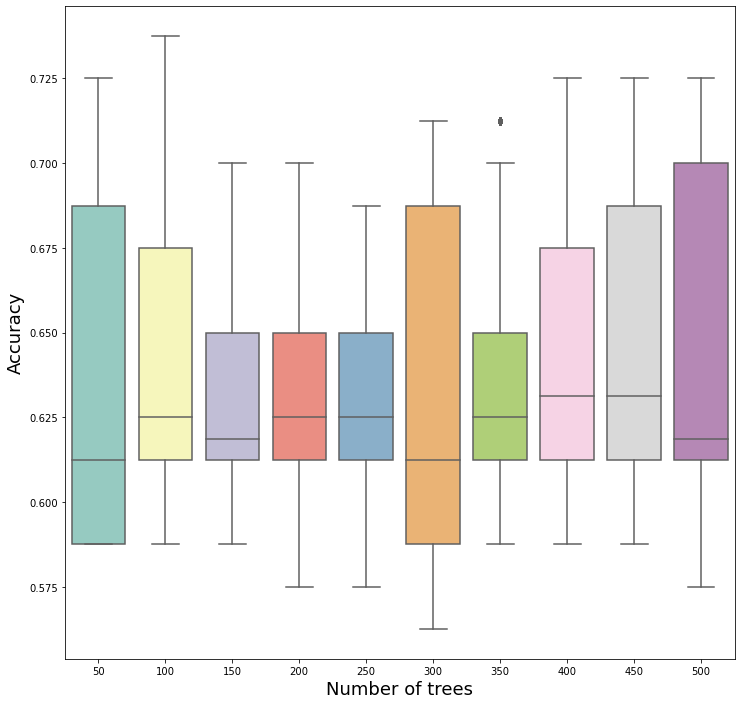

In [78]:
fig, ax = pyplot.subplots(figsize=(12,12))
sns.boxplot(ax = ax, x="n_estimators", y=0, data=df, palette="Set3")
ax.set_xlabel("Number of trees", size=18)
ax.set_ylabel("Accuracy", size=18)
#ax.set(xlabel='Accuracy', ylabel='Number of trees', size=14)
plt.savefig("Figures/RF_trees_boxplot.pdf")
plt.show()

In [ ]:
modeller.all_precision.reset_index().pivot_table(index="max_features",columns="n_estimators", aggfunc="mean")

In [ ]:
import scipy.stats as stats

stats.wilcoxon(modeller.predict(data), data.index)

In [34]:
print(modeller.get_best_features())

[array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, 

#todo
box plots accuracy, precision, recall
best model. and params features

save all the juicy info (params, and features)

In [ ]:
print(model.__callable__("predict_proba")==True)